<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-코스피지수-데이터-크롤링" data-toc-modified-id="1.-코스피지수-데이터-크롤링-1">1. 코스피지수 데이터 크롤링</a></span></li><li><span><a href="#2.-수집날짜-리스트-생성" data-toc-modified-id="2.-수집날짜-리스트-생성-2">2. 수집날짜 리스트 생성</a></span></li><li><span><a href="#3.-팍스넷-뉴스타이틀-크롤링" data-toc-modified-id="3.-팍스넷-뉴스타이틀-크롤링-3">3. 팍스넷 뉴스타이틀 크롤링</a></span></li><li><span><a href="#4.-네이버-뉴스타이틀-크롤링" data-toc-modified-id="4.-네이버-뉴스타이틀-크롤링-4">4. 네이버 뉴스타이틀 크롤링</a></span></li></ul></div>

# 1. 코스피지수 데이터 크롤링

- 수집대상 : yahoo 'finance' -> 코스피지수

- 수집날짜 : 2019.08.01 ~ 2020.02.01

In [16]:
import pandas_datareader as wb
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [17]:
# pd.set_option('precision', 4)

# # 코스피지수 크롤링
# start = datetime.datetime(2021, 1, 1)
# end = datetime.datetime(2021, 12, 31)
# df_null = wb.DataReader("^KS11","yahoo",start,end)     # ^KS11 : 코스피
# df = df_null.dropna()                                  # 결측치 제거

# # 새로운 칼럼 생성
# # (Price : 당일 대비 다음날 주가가 상승했으면 1, 하락했으면 0 표시)
# df['Price'] = 0
# for i in range(0, 120):
#     if df['Close'][i] < df['Close'][i+1]:
#         df['Price'][i] = 1
#     else:
#         df['Price'][i] = 0
# df

In [18]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

df_krx = fdr.StockListing('KRX')

df_KOSPI = df_krx[df_krx['Market']=='KOSPI']
df_KOSDAQ = df_krx[df_krx['Market']=='KOSDAQ']

print(len(df_KOSPI))
print(len(df_KOSDAQ))

KOSPI=list(df_KOSPI['Symbol'])
KOSDAQ=list(df_KOSDAQ['Symbol'])
print(KOSPI)
print(KOSDAQ)

4920
1552
['095570', '006840', '152100', '295820', '253150', '253160', '395750', '395760', '278420', '292750', '309210', '333940', '333950', '333960', '333970', '333980', '269530', '251590', '161510', '251600', '289670', '298340', '189400', '278620', '269540', '287180', '213630', '332610', '332620', '195970', '238670', '195980', '373530', '256450', '239660', '280920', '266550', '301400', '301410', '227830', '122090', '328370', '301440', '376250', '027410', '282330', '138930', '001460', '001465', '001040', '079160', '00104K', '000120', '011150', '011155', '001045', '097950', '097955', '000590', '012030', '016610', '005830', '000990', '000995', '139130', '001530', '000210', '001880', '000215', '375500', '37550K', '004840', '155660', '069730', '017940', '365550', '383220', '007700', '285690', '292730', '402520', '73501BB4', '73502BB4', '73503BB4', '73501BA2', '73502BA2', '73503BA2', '114090', '078930', '006360', '001250', '007070', '078935', '293180', '407310', '332930', '304780', '306520

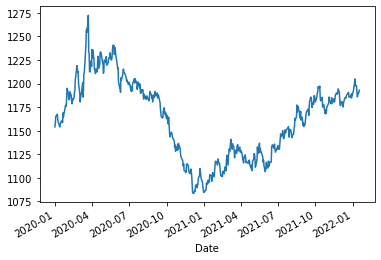

In [19]:
usdkrw = fdr.DataReader('USD/KRW', '2020-01-01')
usdkrw['Close'].plot()
plt.show()

In [20]:
import datetime

pd.set_option('precision', 4)

# 환율 크롤링
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 12, 31)     # ^KS11 : 코스피
df = usdkrw.dropna()                                  # 결측치 제거

df


,Close,Open,High,Low,Change
Date,,,,,
2020-01-01,1154.02,1155.07,1155.32,1154.08,-0.0000
2020-01-02,1157.35,1155.02,1161.15,1153.48,0.0029
2020-01-03,1164.95,1157.94,1168.83,1155.70,0.0066
2020-01-06,1166.94,1165.89,1172.99,1165.78,0.0017
2020-01-07,1167.30,1167.54,1168.82,1163.11,0.0003
...,...,...,...,...,...
2022-01-12,1185.87,1190.55,1193.20,1185.11,-0.0054
2022-01-13,1186.11,1185.96,1189.94,1184.04,0.0002
2022-01-14,1190.07,1186.77,1192.42,1185.67,0.0033


In [21]:
df.to_csv('환율데이터.csv')

In [22]:
# # 'kospi_주가데이터.xlsx' 이름으로 파일 저장
# df.to_csv('kospi_주가데이터.csv')

# 2. 수집날짜 리스트 생성

- 다음날 주가가 하락한 경우 : date_0
- 다음날 주가가 상승한 경우 : date_1

In [23]:
price_data = pd.read_csv('kospi200.csv', encoding="euc-kr")
price_data.rename(columns={'종가(원)':'Close', '회계년도' : 'Date'}, inplace=True)

In [24]:
# 새로운 칼럼 생성
# (Price : 당일 대비 다음날 주가가 상승했으면 1, 하락했으면 0 표시)
price_data['Price'] = 0
price_data

,회사명,거래소코드,Date,종목코드(축약),매매년월일,상장주식수(주),액면가(원),기준가(원),발행가(원),Close,Price
0,BGF리테일보통주,282330,2021/01/04,282330.0,2021/01/04,1.7284e+07,1000.0,135500.0,74700.0,132000.0,0
1,BGF리테일보통주,282330,2021/01/05,282330.0,2021/01/05,1.7284e+07,1000.0,132000.0,74700.0,134500.0,0
2,BGF리테일보통주,282330,2021/01/06,282330.0,2021/01/06,1.7284e+07,1000.0,134500.0,74700.0,134000.0,0
3,BGF리테일보통주,282330,2021/01/07,282330.0,2021/01/07,1.7284e+07,1000.0,134000.0,74700.0,136500.0,0
4,BGF리테일보통주,282330,2021/01/08,282330.0,2021/01/08,1.7284e+07,1000.0,136500.0,74700.0,141000.0,0
...,...,...,...,...,...,...,...,...,...,...,...
48192,휴켐스보통주,69260,2021/12/27,69260.0,2021/12/27,4.0879e+07,1000.0,24000.0,0.0,24000.0,0
48193,휴켐스보통주,69260,2021/12/28,69260.0,2021/12/28,4.0879e+07,1000.0,24000.0,0.0,24000.0,0
48194,휴켐스보통주,69260,2021/12/29,69260.0,2021/12/29,4.0879e+07,1000.0,24000.0,0.0,23350.0,0
48195,휴켐스보통주,69260,2021/12/30,69260.0,2021/12/30,4.0879e+07,1000.0,23350.0,0.0,23150.0,0


In [25]:
for i in range(0, 120):
    if price_data['Close'][i] < price_data['Close'][i+1]:
        price_data['Price'][i] = 1
    else:
        price_data['Price'][i] = 0
price_data = price_data[:120]

C:\Users\ym\AppData\Local\Temp/ipykernel_5064/4080329372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['Price'][i] = 1
C:\Users\ym\AppData\Local\Temp/ipykernel_5064/4080329372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['Price'][i] = 0


In [26]:
df_0 = price_data[price_data['Price']==0]['Date']
price_data
# df = price_data.set_index('Date')


,회사명,거래소코드,Date,종목코드(축약),매매년월일,상장주식수(주),액면가(원),기준가(원),발행가(원),Close,Price
0,BGF리테일보통주,282330,2021/01/04,282330.0,2021/01/04,1.7284e+07,1000.0,135500.0,74700.0,132000.0,1
1,BGF리테일보통주,282330,2021/01/05,282330.0,2021/01/05,1.7284e+07,1000.0,132000.0,74700.0,134500.0,0
2,BGF리테일보통주,282330,2021/01/06,282330.0,2021/01/06,1.7284e+07,1000.0,134500.0,74700.0,134000.0,1
3,BGF리테일보통주,282330,2021/01/07,282330.0,2021/01/07,1.7284e+07,1000.0,134000.0,74700.0,136500.0,1
4,BGF리테일보통주,282330,2021/01/08,282330.0,2021/01/08,1.7284e+07,1000.0,136500.0,74700.0,141000.0,0
...,...,...,...,...,...,...,...,...,...,...,...
115,BGF리테일보통주,282330,2021/06/22,282330.0,2021/06/22,1.7284e+07,1000.0,179500.0,74700.0,178500.0,0
116,BGF리테일보통주,282330,2021/06/23,282330.0,2021/06/23,1.7284e+07,1000.0,178500.0,74700.0,175500.0,1
117,BGF리테일보통주,282330,2021/06/24,282330.0,2021/06/24,1.7284e+07,1000.0,175500.0,74700.0,186000.0,0
118,BGF리테일보통주,282330,2021/06/25,282330.0,2021/06/25,1.7284e+07,1000.0,186000.0,74700.0,185000.0,1


In [27]:
date_0 = []
for i in range(0,len(df_0)):
    date_0.append(str(df_0.tolist()[i])[:10].replace('/',''))
date_0

['20210105',
 '20210108',
 '20210114',
 '20210115',
 '20210121',
 '20210126',
 '20210129',
 '20210201',
 '20210203',
 '20210215',
 '20210216',
 '20210217',
 '20210218',
 '20210222',
 '20210223',
 '20210225',
 '20210226',
 '20210303',
 '20210305',
 '20210309',
 '20210311',
 '20210315',
 '20210316',
 '20210318',
 '20210319',
 '20210322',
 '20210324',
 '20210326',
 '20210329',
 '20210330',
 '20210401',
 '20210402',
 '20210407',
 '20210412',
 '20210414',
 '20210415',
 '20210416',
 '20210420',
 '20210421',
 '20210422',
 '20210423',
 '20210426',
 '20210427',
 '20210428',
 '20210430',
 '20210512',
 '20210513',
 '20210518',
 '20210520',
 '20210521',
 '20210525',
 '20210603',
 '20210607',
 '20210608',
 '20210610',
 '20210614',
 '20210615',
 '20210616',
 '20210617',
 '20210618',
 '20210621',
 '20210622',
 '20210624',
 '20210628']

In [28]:
df_1 = price_data[price_data['Price']==1]['Date']

date_1 = []
for i in range(0,len(df_1)):
    date_1.append(str(df_1.tolist()[i])[:10].replace('/',''))
date_1

len(date_1)

56

In [29]:
# 다른 방법
# 수집날짜 리스트 생성
# date_index = pd.date_range(start='20190801', end='20200131')
# date_list = date_index.strftime("%Y%m%d").tolist()

# 3. 팍스넷 뉴스타이틀 크롤링

- 수집대상 : 팍스넷 '많이 본 뉴스' -> '증권' 분야 뉴스타이틀
- 수집날짜 : 2019.08.01 ~ 2020.01.31 (6개월)

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib import parse

In [24]:
result_list = []
error_cnt = 0

def paxnet_news_title(dates):
    base_url = 'http://www.paxnet.co.kr/news/much?newsSetId=4667&currentPageNo={}&genDate={}&objId=N4667'
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
    }
    
    for date in dates:
        for page in range(1, 3):
            url = base_url.format(page, date)
            res = requests.get(url, headers=headers)
            if res.status_code == 200:
                soup = BeautifulSoup(res.text)
                title_list = soup.select('ul.thumb-list li')
                for title in title_list:
                    try:
                        news_title = title.select_one('dl.text > dt').text.strip()
                        result_list.append([news_title])
                    except:
                        error_cnt += 1

In [25]:
paxnet_news_title(date_0)

In [26]:
title_df_0 = pd.DataFrame(result_list, columns=['뉴스제목'])
title_df_0['주가변동'] = 0
title_df_0.head()

,뉴스제목,주가변동
0,52주 신고가 종목,0
1,증시요약(9) - 기술적 분석 특징주 A(코스닥),0
2,증시요약(10) - 기술적 분석 특징주 B(코스닥),0
3,오후장 기술적 분석 특징주 A(코스닥),0
4,오후장 기술적 분석 특징주 B(코스닥),0


In [27]:
result_list = []
error_cnt = 0

paxnet_news_title(date_1)

In [28]:
title_df_1 = pd.DataFrame(result_list, columns=['뉴스제목'])
title_df_1['주가변동'] = 1
title_df_1.head()

,뉴스제목,주가변동
0,52주 신고가 종목,1
1,증시요약(10) - 기술적 분석 특징주 B(코스닥),1
2,증권사 신규추천 종목,1
3,증시요약(9) - 기술적 분석 특징주 A(코스닥),1
4,장마감 후 주요 종목 공시,1


In [29]:
title_df = pd.concat([title_df_0, title_df_1])
title_df.to_csv('팍스넷_뉴스타이틀.csv', index=False, encoding='utf-8')

In [30]:
title_df

,뉴스제목,주가변동
0,52주 신고가 종목,0
1,증시요약(9) - 기술적 분석 특징주 A(코스닥),0
2,증시요약(10) - 기술적 분석 특징주 B(코스닥),0
3,오후장 기술적 분석 특징주 A(코스닥),0
4,오후장 기술적 분석 특징주 B(코스닥),0
...,...,...
2235,신용비율 상위 종목,1
2236,뉴욕증시 마감시황,1
2237,코스피 하락률 상위 50종목,1
2238,미국 주요 ETF 등락률,1


# 4. 네이버 뉴스타이틀 크롤링

- 수집대상 : 네이버 '많이 본 뉴스' -> '경제' 분야 뉴스타이틀
- 수집날짜 : 2019.08 ~ 2020.01 (6개월)

In [31]:
date_0 = []
for i in range(0,len(df_0)):
    date_0.append(str(df_0.tolist()[i])[:10].replace('/','-'))
date_0

['2021-01-05',
 '2021-01-08',
 '2021-01-14',
 '2021-01-15',
 '2021-01-21',
 '2021-01-26',
 '2021-01-29',
 '2021-02-01',
 '2021-02-03',
 '2021-02-15',
 '2021-02-16',
 '2021-02-17',
 '2021-02-18',
 '2021-02-22',
 '2021-02-23',
 '2021-02-25',
 '2021-02-26',
 '2021-03-03',
 '2021-03-05',
 '2021-03-09',
 '2021-03-11',
 '2021-03-15',
 '2021-03-16',
 '2021-03-18',
 '2021-03-19',
 '2021-03-22',
 '2021-03-24',
 '2021-03-26',
 '2021-03-29',
 '2021-03-30',
 '2021-04-01',
 '2021-04-02',
 '2021-04-07',
 '2021-04-12',
 '2021-04-14',
 '2021-04-15',
 '2021-04-16',
 '2021-04-20',
 '2021-04-21',
 '2021-04-22',
 '2021-04-23',
 '2021-04-26',
 '2021-04-27',
 '2021-04-28',
 '2021-04-30',
 '2021-05-12',
 '2021-05-13',
 '2021-05-18',
 '2021-05-20',
 '2021-05-21',
 '2021-05-25',
 '2021-06-03',
 '2021-06-07',
 '2021-06-08',
 '2021-06-10',
 '2021-06-14',
 '2021-06-15',
 '2021-06-16',
 '2021-06-17',
 '2021-06-18',
 '2021-06-21',
 '2021-06-22',
 '2021-06-24',
 '2021-06-28']

In [32]:
date_1 = []
for i in range(0,len(df_1)):
    date_1.append(str(df_1.tolist()[i])[:10].replace('/','-'))
date_1

['2021-01-04',
 '2021-01-06',
 '2021-01-07',
 '2021-01-11',
 '2021-01-12',
 '2021-01-13',
 '2021-01-18',
 '2021-01-19',
 '2021-01-20',
 '2021-01-22',
 '2021-01-25',
 '2021-01-27',
 '2021-01-28',
 '2021-02-02',
 '2021-02-04',
 '2021-02-05',
 '2021-02-08',
 '2021-02-09',
 '2021-02-10',
 '2021-02-19',
 '2021-02-24',
 '2021-03-02',
 '2021-03-04',
 '2021-03-08',
 '2021-03-10',
 '2021-03-12',
 '2021-03-17',
 '2021-03-23',
 '2021-03-25',
 '2021-03-31',
 '2021-04-05',
 '2021-04-06',
 '2021-04-08',
 '2021-04-09',
 '2021-04-13',
 '2021-04-19',
 '2021-04-29',
 '2021-05-03',
 '2021-05-04',
 '2021-05-06',
 '2021-05-07',
 '2021-05-10',
 '2021-05-11',
 '2021-05-14',
 '2021-05-17',
 '2021-05-24',
 '2021-05-26',
 '2021-05-27',
 '2021-05-28',
 '2021-05-31',
 '2021-06-01',
 '2021-06-02',
 '2021-06-04',
 '2021-06-09',
 '2021-06-23',
 '2021-06-25']

In [34]:
result_list = []
error_cnt = 0

def naver_news_title(dates):
    base_url = 'https://finance.naver.com/news/news_read.naver?&mode=mainnews&type=1&date={}}'
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'
    }
    
    for date in dates:
        url = base_url.format(date)
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            soup = BeautifulSoup(res.text)
            title_list = soup.select('div.main_news > ul > li > a')
            for title in title_list:
                try:
                    news_title = title.select_one('div.ranking_headline').text.strip()
                    result_list.append([news_title])
                except:
                    error_cnt += 1

In [35]:
naver_news_title(date_0)

ValueError: Single '}' encountered in format string

In [33]:
title_df_2 = pd.DataFrame(result_list, columns=['뉴스제목'])
title_df_2['주가변동'] = 0
title_df_2.head()

,뉴스제목,주가변동


In [25]:
result_list = []
error_cnt = 0

naver_news_title(date_1)

In [26]:
title_df_3 = pd.DataFrame(result_list, columns=['뉴스제목'])
title_df_3['주가변동'] = 1
title_df_3.head()

,뉴스제목,주가변동


In [27]:
title_df2 = pd.concat([title_df_2, title_df_3])
title_df2.to_csv('네이버_뉴스타이틀.csv', index=False, encoding='utf-8')

In [28]:
title_df2

,뉴스제목,주가변동


In [29]:
all_title = pd.concat([title_df, title_df2])

# '팍스넷&네이버_뉴스타이틀' 이름으로 파일 저장
all_title.to_csv('팍스넷&네이버_뉴스타이틀.csv')

In [31]:
import requests
from bs4 import BeautifulSoup

def print_title(address, query):

    for i in range(1,10):
        startvalue = 10* i - 9
        addr= address  +query+'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=34&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='+str(startvalue)

        res = requests.get(addr)
        soup = BeautifulSoup(res.content, 'html.parser')


        items = soup.select('.news_tit')
        for item in items:

            print(item.text)


if __name__ == '__main__':
    baseaddress = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query='
    query = '부동산'

    for i in range(1,35):
        print_title(baseaddress, query)

‘뚝’ 꺾인 부동산 매수심리…1년 8개월 만에 상승→보합
"부동산 증여, 할 사람 다 했나"…작년 하반기 40세미만 청장년층 수증인 급감
홍남기 "부동산 탈세 엄정 대응 필요"
급등하는 '금리'…부동산·주식·코인, 줄줄이 하락하나
경기도, 부동산투기 연중 단속…부정청약 수사 집중
올해 상업용 부동산 전망..."물류·데이터센터 ‘맑음’, 호텔 ‘흐림’"
부동산 전문가들 “다주택 양도세와 1주택 보유세부터 줄여야”
'벼락거지' 설움 씻어 볼까…가상 부동산 투자 인기
[단독] "부동산 하락 대비하라"…금감원, 전 금융사 '맷집' 따진다
[이슈분석] ‘세금·주택공급’ 해법 다른 李·尹…부동산 표심은 어디로
與 “양평에 尹장모 명의신탁 의혹 부동산 1400평 추가 확인”
부동산 자산운용사들 "올해 최대 변수는 금리"
‘부동산·봉쇄’ 등 악재 겹겹이…中 4분기 성장률 3%대 추락하나 [장가희 기...
방송기자연합회 "취재 정보로 주식·부동산 투자 안 돼"
이종혁 중개사협회장 "건전한 부동산거래 질서 확립에 총력"
"종합 부동산 그룹 입지 강화"…신영, CI·BI 새 단장
전세 가격은 안정세지만…불씨는 여전 [부동산360]
이재명 “금강산 관광 재개”…윤석열 “서울 교통·부동산 공약”
대선 누가 돼도 부동산 규제완화?…세부 계획은 차이 커[부동산360]
블록체인·NFT·메타버스…고정관념 허문 新부동산 투자
경기도 특사경, 부동산 투기 척결에 올인한다
윤석열 "온라인 부동산 등기부등본 열람·발급 무료" 공약
부동산·금 고집하던 박종복X전원주 홀린 NFT 호재 뭐길래(집사부일체)[어제T...
익산시 부동산 투기 ‘원스트라이크 아웃’
올해 부동산 트렌드는 희망과 현실 간 '차이'
아파트 대체재 수요에…오피스텔 가격, 작년 4분기 1%대 상승 [부동산360]
부동산 전문가 박종복 "'집사부' 출연 후 삼성동 100억 빌딩 추가 장만"
부동산 민심 공들이는 이재명 “용적률 500% 지역 신설”
가계대출 규제 강해지자…2금융권, 기업에 부동산 대출 대폭 내줬다
"서울, 힘 모아달라"

KT알파, 메타버스 부동산 거래 시스템 구축한다
가격 널뛰는 부동산, 이혼 시 재산분할 어떻게?
이재명 측 “부동산만큼은 문재인정부와 확실히 차별화”
주요 민원 이슈는?…20대는 '일자리', 30대는 '부동산'
‘빠숑’ 김학렬 “서울 집값은 올해도 오른다” [부동산 전문가 인터뷰①]
자영업·부동산 대출 부실 위기… 당국 “충당금 적립 강하게 압박할 것”
이재명, '부동산 비판' 尹에 "돼지 눈엔 돼지만 보여"(종합)
KD㈜, 공격경영 통해 부동산개발전문기업·중견그룹으로 성장 계획
너도나도 풀겠다는 재건축 안전진단…희망고문 마침표(?) [부동산360]
홍남기 부총리, 국세청에 “부동산 탈세 엄정 대응” 강조
광진구, 부동산 거래 안전하게 '부동산중개업 실무 길라잡이' 발간
질주하던 서울 중저가 아파트…거래비중도 가격도 ‘뚝’ [부동산360]
윤석열 "부동산 규제 정상화…집값 잡고 고통 덜어드리겠다"
김동연 "文정부 부동산대책 대통령 보고 중 고성 오가며 싸워"
부동산원, 녹색건축 어린이 독후감 시상
[스물셋, 말레이시아에 떴다] 바람처럼 사라진 부동산 에이전트
[제정임 칼럼] ‘하우스푸어’ 시대로 가는 부동산 공약
심상정, 李·尹에 "부동산 투기 연루 의혹 받는 분들"
현실화된 이자부담…부동산 위축 가속화
부동산‧주식 거품 붕괴에도 살아남는 법은 무엇? [투자 고수]
‘뚝’ 꺾인 부동산 매수심리…1년 8개월 만에 상승→보합
"부동산 증여, 할 사람 다 했나"…작년 하반기 40세미만 청장년층 수증인 급감
홍남기 "부동산 탈세 엄정 대응 필요"
급등하는 '금리'…부동산·주식·코인, 줄줄이 하락하나
경기도, 부동산투기 연중 단속…부정청약 수사 집중
올해 상업용 부동산 전망..."물류·데이터센터 ‘맑음’, 호텔 ‘흐림’"
부동산 전문가들 “다주택 양도세와 1주택 보유세부터 줄여야”
'벼락거지' 설움 씻어 볼까…가상 부동산 투자 인기
[단독] "부동산 하락 대비하라"…금감원, 전 금융사 '맷집' 따진다
[이슈분석] ‘세금·주택공급’ 해법 다른 李·尹…부동산 표심은 어디로

포항시, 부동산불법거래와의 전쟁…불법행위 58건 적발
[대선상황실] 같은듯 다른듯…부동산 공약 '데칼코마니'
영끌, 빚투해서 산 부동산 어떡하죠? (feat. 김경민 교수) [뭘스트리트]
주식·부동산·암호화폐·저축…'집사부일체' 부자 사부들이 말하는 유망 투자...
지방 부동산 한파에도 '속초' 아파트값 고공행진…왜?
매경부동산사업단, 2022년 부동산대전망 세미나 개최··· 국내 최고 전문가...
[부동산 인사이트] 똑같아진 양당 부동산 공약, 그대로만 하면 시장 안정된다
윤석열 "철도 지하화해 주택 늘리겠다"... 서울 필승 해법은 '부동산+교통'
이재명 "통일부 명칭 변경"…윤석열 '방역·부동산' 비판
15년만에 연속 기준금리 인상…'하락세' 부동산 시장 쐐기박나
[절세비법]"아는 만큼 아낀다"…올해 달라진 부동산 세재혜택은?
부동산·코인서 빠진돈 예적금으로…돈의 흐름 바뀌나?
자산가도 MZ도…리츠〈REITs·부동산신탁>로 눈 돌리다 [재테크 플러스]
거창군, 부동산 특별조치법 올해 8월 4일 접수 마감
윤석열, 오늘 서울 공약 발표…부동산·복지 포함될 듯
[집중진단] 15년 만에 연속 기준금리 인상…주식·부동산 줄줄이 하락?
[이승우 iH 사장 새해 인터뷰] 'i-BEST' 전략… 부동산 플랫폼 공기업 원년 될...
디와이디, 메타버스 플랫폼 기업 아이디엔디 인수…메타버스 부동산 사업 진출
[부동산 100자 정보] 인천 뉴서울·현대아파트 재건축 수주 외
[시경Today-부동산] 더샵 리듬시티, 지제역 푸르지오 엘리아츠 2월 분양 外
KT알파, 메타버스 부동산 거래 시스템 구축한다
가격 널뛰는 부동산, 이혼 시 재산분할 어떻게?
이재명 측 “부동산만큼은 문재인정부와 확실히 차별화”
주요 민원 이슈는?…20대는 '일자리', 30대는 '부동산'
‘빠숑’ 김학렬 “서울 집값은 올해도 오른다” [부동산 전문가 인터뷰①]
자영업·부동산 대출 부실 위기… 당국 “충당금 적립 강하게 압박할 것”
이재명, '부동산 비판' 尹에 "돼지 눈엔 돼지만 보여"(종합)
KD㈜,

경기도 특사경, 부동산 투기 척결에 올인한다
윤석열 "온라인 부동산 등기부등본 열람·발급 무료" 공약
부동산·금 고집하던 박종복X전원주 홀린 NFT 호재 뭐길래(집사부일체)[어제T...
익산시 부동산 투기 ‘원스트라이크 아웃’
올해 부동산 트렌드는 희망과 현실 간 '차이'
아파트 대체재 수요에…오피스텔 가격, 작년 4분기 1%대 상승 [부동산360]
부동산 전문가 박종복 "'집사부' 출연 후 삼성동 100억 빌딩 추가 장만"
부동산 민심 공들이는 이재명 “용적률 500% 지역 신설”
가계대출 규제 강해지자…2금융권, 기업에 부동산 대출 대폭 내줬다
"서울, 힘 모아달라" 윤석열 서울공략 행보, 부동산규제·거리두기 완화 공약
부동산 멀어졌지만 ‘리츠’는 가까워진다
씨티 "中, 부동산 침체에도 통화정책 더 완화"
법원, 신창재 교보생명 회장 부동산에 가압류 결정
[‘차율’의 부동산 법률] 지역주택조합은 원수에게나 추천한다?
부동산불법거래와의 전쟁은 현재 진행 중!
기준금리 연속 인상… 부동산시장 어떻게 되나
SK證, 블록체인 기반 부동산 유동화 시스템 구축 협약
[시론]모순에 빠진 부동산 공약
메타버스 부동산 투자 열풍…가격 결정 요인은
경기 전세값 빠지고, 서울 전세 수급은 '빨간불' [빠숑의 주간부동산]
골드만 "中 신재생에너지, 부동산 대신 경제 성장 촉진할 것"
'절세용 증여'도 끝물? 작년 하반기 부동산 증여 30% 감소
미분양은 집값 하락 신호, 10년 부동산 침체기 온다
롯데건설 부동산개발 강화 "신성장동력으로 키우겠다"
울산, 라인 부동산 경매 서비스 ‘경매야’와 함께 NFT 기반 기부 경매 실시
[부동산백서]"1호선 지하화" vs "GTX 신설"…공약 2라운드는 철도 인프라
집값 상승률 '탑10 중 4곳 호남권'…경기도는 혼재 [빠숑의 주간부동산]
[성호건의전지적토지관점] 부동산도 콘텐츠와 스토리가 중요한 시대이다
윤석열 “서울, 가장 살기 힘든 곳 됐다”…‘부동산과 교통’ 서울 공약 제시
'빚 잔치' 끝났다…부동산·코인·주식 본격 하락장
포항시,

광진구, 부동산 거래 안전하게 '부동산중개업 실무 길라잡이' 발간
질주하던 서울 중저가 아파트…거래비중도 가격도 ‘뚝’ [부동산360]
윤석열 "부동산 규제 정상화…집값 잡고 고통 덜어드리겠다"
김동연 "文정부 부동산대책 대통령 보고 중 고성 오가며 싸워"
부동산원, 녹색건축 어린이 독후감 시상
[스물셋, 말레이시아에 떴다] 바람처럼 사라진 부동산 에이전트
[제정임 칼럼] ‘하우스푸어’ 시대로 가는 부동산 공약
심상정, 李·尹에 "부동산 투기 연루 의혹 받는 분들"
현실화된 이자부담…부동산 위축 가속화
부동산‧주식 거품 붕괴에도 살아남는 법은 무엇? [투자 고수]
‘뚝’ 꺾인 부동산 매수심리…1년 8개월 만에 상승→보합
"부동산 증여, 할 사람 다 했나"…작년 하반기 40세미만 청장년층 수증인 급감
홍남기 "부동산 탈세 엄정 대응 필요"
급등하는 '금리'…부동산·주식·코인, 줄줄이 하락하나
경기도, 부동산투기 연중 단속…부정청약 수사 집중
올해 상업용 부동산 전망..."물류·데이터센터 ‘맑음’, 호텔 ‘흐림’"
부동산 전문가들 “다주택 양도세와 1주택 보유세부터 줄여야”
'벼락거지' 설움 씻어 볼까…가상 부동산 투자 인기
[단독] "부동산 하락 대비하라"…금감원, 전 금융사 '맷집' 따진다
[이슈분석] ‘세금·주택공급’ 해법 다른 李·尹…부동산 표심은 어디로
與 “양평에 尹장모 명의신탁 의혹 부동산 1400평 추가 확인”
부동산 자산운용사들 "올해 최대 변수는 금리"
‘부동산·봉쇄’ 등 악재 겹겹이…中 4분기 성장률 3%대 추락하나 [장가희 기...
방송기자연합회 "취재 정보로 주식·부동산 투자 안 돼"
이종혁 중개사협회장 "건전한 부동산거래 질서 확립에 총력"
"종합 부동산 그룹 입지 강화"…신영, CI·BI 새 단장
전세 가격은 안정세지만…불씨는 여전 [부동산360]
이재명 “금강산 관광 재개”…윤석열 “서울 교통·부동산 공약”
대선 누가 돼도 부동산 규제완화?…세부 계획은 차이 커[부동산360]
블록체인·NFT·메타버스…고정관념 허문 新부동산 투자
경기도

[절세비법]"아는 만큼 아낀다"…올해 달라진 부동산 세재혜택은?
부동산·코인서 빠진돈 예적금으로…돈의 흐름 바뀌나?
자산가도 MZ도…리츠〈REITs·부동산신탁>로 눈 돌리다 [재테크 플러스]
거창군, 부동산 특별조치법 올해 8월 4일 접수 마감
윤석열, 오늘 서울 공약 발표…부동산·복지 포함될 듯
[집중진단] 15년 만에 연속 기준금리 인상…주식·부동산 줄줄이 하락?
[이승우 iH 사장 새해 인터뷰] 'i-BEST' 전략… 부동산 플랫폼 공기업 원년 될...
디와이디, 메타버스 플랫폼 기업 아이디엔디 인수…메타버스 부동산 사업 진출
[부동산 100자 정보] 인천 뉴서울·현대아파트 재건축 수주 외
[시경Today-부동산] 더샵 리듬시티, 지제역 푸르지오 엘리아츠 2월 분양 外
KT알파, 메타버스 부동산 거래 시스템 구축한다
가격 널뛰는 부동산, 이혼 시 재산분할 어떻게?
이재명 측 “부동산만큼은 문재인정부와 확실히 차별화”
주요 민원 이슈는?…20대는 '일자리', 30대는 '부동산'
‘빠숑’ 김학렬 “서울 집값은 올해도 오른다” [부동산 전문가 인터뷰①]
자영업·부동산 대출 부실 위기… 당국 “충당금 적립 강하게 압박할 것”
이재명, '부동산 비판' 尹에 "돼지 눈엔 돼지만 보여"(종합)
KD㈜, 공격경영 통해 부동산개발전문기업·중견그룹으로 성장 계획
너도나도 풀겠다는 재건축 안전진단…희망고문 마침표(?) [부동산360]
홍남기 부총리, 국세청에 “부동산 탈세 엄정 대응” 강조
광진구, 부동산 거래 안전하게 '부동산중개업 실무 길라잡이' 발간
질주하던 서울 중저가 아파트…거래비중도 가격도 ‘뚝’ [부동산360]
윤석열 "부동산 규제 정상화…집값 잡고 고통 덜어드리겠다"
김동연 "文정부 부동산대책 대통령 보고 중 고성 오가며 싸워"
부동산원, 녹색건축 어린이 독후감 시상
[스물셋, 말레이시아에 떴다] 바람처럼 사라진 부동산 에이전트
[제정임 칼럼] ‘하우스푸어’ 시대로 가는 부동산 공약
심상정, 李·尹에 "부동산 투기 연루 의혹 받는 분들"
현실화된 이자부담…부동

골드만 "中 신재생에너지, 부동산 대신 경제 성장 촉진할 것"
'절세용 증여'도 끝물? 작년 하반기 부동산 증여 30% 감소
미분양은 집값 하락 신호, 10년 부동산 침체기 온다
롯데건설 부동산개발 강화 "신성장동력으로 키우겠다"
울산, 라인 부동산 경매 서비스 ‘경매야’와 함께 NFT 기반 기부 경매 실시
[부동산백서]"1호선 지하화" vs "GTX 신설"…공약 2라운드는 철도 인프라
집값 상승률 '탑10 중 4곳 호남권'…경기도는 혼재 [빠숑의 주간부동산]
[성호건의전지적토지관점] 부동산도 콘텐츠와 스토리가 중요한 시대이다
윤석열 “서울, 가장 살기 힘든 곳 됐다”…‘부동산과 교통’ 서울 공약 제시
'빚 잔치' 끝났다…부동산·코인·주식 본격 하락장
포항시, 부동산불법거래와의 전쟁…불법행위 58건 적발
[대선상황실] 같은듯 다른듯…부동산 공약 '데칼코마니'
영끌, 빚투해서 산 부동산 어떡하죠? (feat. 김경민 교수) [뭘스트리트]
주식·부동산·암호화폐·저축…'집사부일체' 부자 사부들이 말하는 유망 투자...
지방 부동산 한파에도 '속초' 아파트값 고공행진…왜?
매경부동산사업단, 2022년 부동산대전망 세미나 개최··· 국내 최고 전문가...
[부동산 인사이트] 똑같아진 양당 부동산 공약, 그대로만 하면 시장 안정된다
윤석열 "철도 지하화해 주택 늘리겠다"... 서울 필승 해법은 '부동산+교통'
이재명 "통일부 명칭 변경"…윤석열 '방역·부동산' 비판
15년만에 연속 기준금리 인상…'하락세' 부동산 시장 쐐기박나
[절세비법]"아는 만큼 아낀다"…올해 달라진 부동산 세재혜택은?
부동산·코인서 빠진돈 예적금으로…돈의 흐름 바뀌나?
자산가도 MZ도…리츠〈REITs·부동산신탁>로 눈 돌리다 [재테크 플러스]
거창군, 부동산 특별조치법 올해 8월 4일 접수 마감
윤석열, 오늘 서울 공약 발표…부동산·복지 포함될 듯
[집중진단] 15년 만에 연속 기준금리 인상…주식·부동산 줄줄이 하락?
[이승우 iH 사장 새해 인터뷰] 'i-BEST' 전략… 부동산 플랫폼 공기업 원

與 “양평에 尹장모 명의신탁 의혹 부동산 1400평 추가 확인”
부동산 자산운용사들 "올해 최대 변수는 금리"
‘부동산·봉쇄’ 등 악재 겹겹이…中 4분기 성장률 3%대 추락하나 [장가희 기...
방송기자연합회 "취재 정보로 주식·부동산 투자 안 돼"
이종혁 중개사협회장 "건전한 부동산거래 질서 확립에 총력"
"종합 부동산 그룹 입지 강화"…신영, CI·BI 새 단장
전세 가격은 안정세지만…불씨는 여전 [부동산360]
이재명 “금강산 관광 재개”…윤석열 “서울 교통·부동산 공약”
대선 누가 돼도 부동산 규제완화?…세부 계획은 차이 커[부동산360]
블록체인·NFT·메타버스…고정관념 허문 新부동산 투자
경기도 특사경, 부동산 투기 척결에 올인한다
윤석열 "온라인 부동산 등기부등본 열람·발급 무료" 공약
부동산·금 고집하던 박종복X전원주 홀린 NFT 호재 뭐길래(집사부일체)[어제T...
익산시 부동산 투기 ‘원스트라이크 아웃’
올해 부동산 트렌드는 희망과 현실 간 '차이'
아파트 대체재 수요에…오피스텔 가격, 작년 4분기 1%대 상승 [부동산360]
부동산 전문가 박종복 "'집사부' 출연 후 삼성동 100억 빌딩 추가 장만"
부동산 민심 공들이는 이재명 “용적률 500% 지역 신설”
가계대출 규제 강해지자…2금융권, 기업에 부동산 대출 대폭 내줬다
"서울, 힘 모아달라" 윤석열 서울공략 행보, 부동산규제·거리두기 완화 공약
부동산 멀어졌지만 ‘리츠’는 가까워진다
씨티 "中, 부동산 침체에도 통화정책 더 완화"
법원, 신창재 교보생명 회장 부동산에 가압류 결정
[‘차율’의 부동산 법률] 지역주택조합은 원수에게나 추천한다?
부동산불법거래와의 전쟁은 현재 진행 중!
기준금리 연속 인상… 부동산시장 어떻게 되나
SK證, 블록체인 기반 부동산 유동화 시스템 구축 협약
[시론]모순에 빠진 부동산 공약
메타버스 부동산 투자 열풍…가격 결정 요인은
경기 전세값 빠지고, 서울 전세 수급은 '빨간불' [빠숑의 주간부동산]
골드만 "中 신재생에너지, 부동산 대신 경제 성장 촉진할 것"

[시경Today-부동산] 더샵 리듬시티, 지제역 푸르지오 엘리아츠 2월 분양 外
KT알파, 메타버스 부동산 거래 시스템 구축한다
가격 널뛰는 부동산, 이혼 시 재산분할 어떻게?
이재명 측 “부동산만큼은 문재인정부와 확실히 차별화”
주요 민원 이슈는?…20대는 '일자리', 30대는 '부동산'
‘빠숑’ 김학렬 “서울 집값은 올해도 오른다” [부동산 전문가 인터뷰①]
자영업·부동산 대출 부실 위기… 당국 “충당금 적립 강하게 압박할 것”
이재명, '부동산 비판' 尹에 "돼지 눈엔 돼지만 보여"(종합)
KD㈜, 공격경영 통해 부동산개발전문기업·중견그룹으로 성장 계획
너도나도 풀겠다는 재건축 안전진단…희망고문 마침표(?) [부동산360]
홍남기 부총리, 국세청에 “부동산 탈세 엄정 대응” 강조
광진구, 부동산 거래 안전하게 '부동산중개업 실무 길라잡이' 발간
질주하던 서울 중저가 아파트…거래비중도 가격도 ‘뚝’ [부동산360]
윤석열 "부동산 규제 정상화…집값 잡고 고통 덜어드리겠다"
김동연 "文정부 부동산대책 대통령 보고 중 고성 오가며 싸워"
부동산원, 녹색건축 어린이 독후감 시상
[스물셋, 말레이시아에 떴다] 바람처럼 사라진 부동산 에이전트
[제정임 칼럼] ‘하우스푸어’ 시대로 가는 부동산 공약
심상정, 李·尹에 "부동산 투기 연루 의혹 받는 분들"
현실화된 이자부담…부동산 위축 가속화
부동산‧주식 거품 붕괴에도 살아남는 법은 무엇? [투자 고수]
‘뚝’ 꺾인 부동산 매수심리…1년 8개월 만에 상승→보합
"부동산 증여, 할 사람 다 했나"…작년 하반기 40세미만 청장년층 수증인 급감
홍남기 "부동산 탈세 엄정 대응 필요"
급등하는 '금리'…부동산·주식·코인, 줄줄이 하락하나
경기도, 부동산투기 연중 단속…부정청약 수사 집중
올해 상업용 부동산 전망..."물류·데이터센터 ‘맑음’, 호텔 ‘흐림’"
부동산 전문가들 “다주택 양도세와 1주택 보유세부터 줄여야”
'벼락거지' 설움 씻어 볼까…가상 부동산 투자 인기
[단독] "부동산 하락 대비하라"…금감원, 전 금융사 '맷

포항시, 부동산불법거래와의 전쟁…불법행위 58건 적발
[대선상황실] 같은듯 다른듯…부동산 공약 '데칼코마니'
영끌, 빚투해서 산 부동산 어떡하죠? (feat. 김경민 교수) [뭘스트리트]
주식·부동산·암호화폐·저축…'집사부일체' 부자 사부들이 말하는 유망 투자...
지방 부동산 한파에도 '속초' 아파트값 고공행진…왜?
매경부동산사업단, 2022년 부동산대전망 세미나 개최··· 국내 최고 전문가...
[부동산 인사이트] 똑같아진 양당 부동산 공약, 그대로만 하면 시장 안정된다
윤석열 "철도 지하화해 주택 늘리겠다"... 서울 필승 해법은 '부동산+교통'
이재명 "통일부 명칭 변경"…윤석열 '방역·부동산' 비판
15년만에 연속 기준금리 인상…'하락세' 부동산 시장 쐐기박나
[절세비법]"아는 만큼 아낀다"…올해 달라진 부동산 세재혜택은?
부동산·코인서 빠진돈 예적금으로…돈의 흐름 바뀌나?
자산가도 MZ도…리츠〈REITs·부동산신탁>로 눈 돌리다 [재테크 플러스]
거창군, 부동산 특별조치법 올해 8월 4일 접수 마감
윤석열, 오늘 서울 공약 발표…부동산·복지 포함될 듯
[집중진단] 15년 만에 연속 기준금리 인상…주식·부동산 줄줄이 하락?
[이승우 iH 사장 새해 인터뷰] 'i-BEST' 전략… 부동산 플랫폼 공기업 원년 될...
디와이디, 메타버스 플랫폼 기업 아이디엔디 인수…메타버스 부동산 사업 진출
[부동산 100자 정보] 인천 뉴서울·현대아파트 재건축 수주 외
[시경Today-부동산] 더샵 리듬시티, 지제역 푸르지오 엘리아츠 2월 분양 外
KT알파, 메타버스 부동산 거래 시스템 구축한다
가격 널뛰는 부동산, 이혼 시 재산분할 어떻게?
이재명 측 “부동산만큼은 문재인정부와 확실히 차별화”
주요 민원 이슈는?…20대는 '일자리', 30대는 '부동산'
‘빠숑’ 김학렬 “서울 집값은 올해도 오른다” [부동산 전문가 인터뷰①]
자영업·부동산 대출 부실 위기… 당국 “충당금 적립 강하게 압박할 것”
이재명, '부동산 비판' 尹에 "돼지 눈엔 돼지만 보여"(종합)
KD㈜,

부동산 멀어졌지만 ‘리츠’는 가까워진다
씨티 "中, 부동산 침체에도 통화정책 더 완화"
법원, 신창재 교보생명 회장 부동산에 가압류 결정
[‘차율’의 부동산 법률] 지역주택조합은 원수에게나 추천한다?
부동산불법거래와의 전쟁은 현재 진행 중!
기준금리 연속 인상… 부동산시장 어떻게 되나
SK證, 블록체인 기반 부동산 유동화 시스템 구축 협약
[시론]모순에 빠진 부동산 공약
메타버스 부동산 투자 열풍…가격 결정 요인은
경기 전세값 빠지고, 서울 전세 수급은 '빨간불' [빠숑의 주간부동산]
골드만 "中 신재생에너지, 부동산 대신 경제 성장 촉진할 것"
'절세용 증여'도 끝물? 작년 하반기 부동산 증여 30% 감소
미분양은 집값 하락 신호, 10년 부동산 침체기 온다
롯데건설 부동산개발 강화 "신성장동력으로 키우겠다"
울산, 라인 부동산 경매 서비스 ‘경매야’와 함께 NFT 기반 기부 경매 실시
[부동산백서]"1호선 지하화" vs "GTX 신설"…공약 2라운드는 철도 인프라
집값 상승률 '탑10 중 4곳 호남권'…경기도는 혼재 [빠숑의 주간부동산]
[성호건의전지적토지관점] 부동산도 콘텐츠와 스토리가 중요한 시대이다
윤석열 “서울, 가장 살기 힘든 곳 됐다”…‘부동산과 교통’ 서울 공약 제시
'빚 잔치' 끝났다…부동산·코인·주식 본격 하락장
포항시, 부동산불법거래와의 전쟁…불법행위 58건 적발
[대선상황실] 같은듯 다른듯…부동산 공약 '데칼코마니'
영끌, 빚투해서 산 부동산 어떡하죠? (feat. 김경민 교수) [뭘스트리트]
주식·부동산·암호화폐·저축…'집사부일체' 부자 사부들이 말하는 유망 투자...
지방 부동산 한파에도 '속초' 아파트값 고공행진…왜?
매경부동산사업단, 2022년 부동산대전망 세미나 개최··· 국내 최고 전문가...
[부동산 인사이트] 똑같아진 양당 부동산 공약, 그대로만 하면 시장 안정된다
윤석열 "철도 지하화해 주택 늘리겠다"... 서울 필승 해법은 '부동산+교통'
이재명 "통일부 명칭 변경"…윤석열 '방역·부동산' 비판
15년만에 연속 기준금리

與 “양평에 尹장모 명의신탁 의혹 부동산 1400평 추가 확인”
부동산 자산운용사들 "올해 최대 변수는 금리"
‘부동산·봉쇄’ 등 악재 겹겹이…中 4분기 성장률 3%대 추락하나 [장가희 기...
방송기자연합회 "취재 정보로 주식·부동산 투자 안 돼"
이종혁 중개사협회장 "건전한 부동산거래 질서 확립에 총력"
"종합 부동산 그룹 입지 강화"…신영, CI·BI 새 단장
전세 가격은 안정세지만…불씨는 여전 [부동산360]
이재명 “금강산 관광 재개”…윤석열 “서울 교통·부동산 공약”
대선 누가 돼도 부동산 규제완화?…세부 계획은 차이 커[부동산360]
블록체인·NFT·메타버스…고정관념 허문 新부동산 투자
경기도 특사경, 부동산 투기 척결에 올인한다
윤석열 "온라인 부동산 등기부등본 열람·발급 무료" 공약
부동산·금 고집하던 박종복X전원주 홀린 NFT 호재 뭐길래(집사부일체)[어제T...
익산시 부동산 투기 ‘원스트라이크 아웃’
올해 부동산 트렌드는 희망과 현실 간 '차이'
아파트 대체재 수요에…오피스텔 가격, 작년 4분기 1%대 상승 [부동산360]
부동산 전문가 박종복 "'집사부' 출연 후 삼성동 100억 빌딩 추가 장만"
부동산 민심 공들이는 이재명 “용적률 500% 지역 신설”
가계대출 규제 강해지자…2금융권, 기업에 부동산 대출 대폭 내줬다
"서울, 힘 모아달라" 윤석열 서울공략 행보, 부동산규제·거리두기 완화 공약
부동산 멀어졌지만 ‘리츠’는 가까워진다
씨티 "中, 부동산 침체에도 통화정책 더 완화"
법원, 신창재 교보생명 회장 부동산에 가압류 결정
[‘차율’의 부동산 법률] 지역주택조합은 원수에게나 추천한다?
부동산불법거래와의 전쟁은 현재 진행 중!
기준금리 연속 인상… 부동산시장 어떻게 되나
SK證, 블록체인 기반 부동산 유동화 시스템 구축 협약
[시론]모순에 빠진 부동산 공약
메타버스 부동산 투자 열풍…가격 결정 요인은
경기 전세값 빠지고, 서울 전세 수급은 '빨간불' [빠숑의 주간부동산]
골드만 "中 신재생에너지, 부동산 대신 경제 성장 촉진할 것"

KT알파, 메타버스 부동산 거래 시스템 구축한다
가격 널뛰는 부동산, 이혼 시 재산분할 어떻게?
이재명 측 “부동산만큼은 문재인정부와 확실히 차별화”
주요 민원 이슈는?…20대는 '일자리', 30대는 '부동산'
‘빠숑’ 김학렬 “서울 집값은 올해도 오른다” [부동산 전문가 인터뷰①]
자영업·부동산 대출 부실 위기… 당국 “충당금 적립 강하게 압박할 것”
이재명, '부동산 비판' 尹에 "돼지 눈엔 돼지만 보여"(종합)
KD㈜, 공격경영 통해 부동산개발전문기업·중견그룹으로 성장 계획
너도나도 풀겠다는 재건축 안전진단…희망고문 마침표(?) [부동산360]
홍남기 부총리, 국세청에 “부동산 탈세 엄정 대응” 강조
광진구, 부동산 거래 안전하게 '부동산중개업 실무 길라잡이' 발간
질주하던 서울 중저가 아파트…거래비중도 가격도 ‘뚝’ [부동산360]
윤석열 "부동산 규제 정상화…집값 잡고 고통 덜어드리겠다"
김동연 "文정부 부동산대책 대통령 보고 중 고성 오가며 싸워"
부동산원, 녹색건축 어린이 독후감 시상
[스물셋, 말레이시아에 떴다] 바람처럼 사라진 부동산 에이전트
[제정임 칼럼] ‘하우스푸어’ 시대로 가는 부동산 공약
심상정, 李·尹에 "부동산 투기 연루 의혹 받는 분들"
현실화된 이자부담…부동산 위축 가속화
부동산‧주식 거품 붕괴에도 살아남는 법은 무엇? [투자 고수]
‘뚝’ 꺾인 부동산 매수심리…1년 8개월 만에 상승→보합
"부동산 증여, 할 사람 다 했나"…작년 하반기 40세미만 청장년층 수증인 급감
홍남기 "부동산 탈세 엄정 대응 필요"
급등하는 '금리'…부동산·주식·코인, 줄줄이 하락하나
경기도, 부동산투기 연중 단속…부정청약 수사 집중
올해 상업용 부동산 전망..."물류·데이터센터 ‘맑음’, 호텔 ‘흐림’"
부동산 전문가들 “다주택 양도세와 1주택 보유세부터 줄여야”
'벼락거지' 설움 씻어 볼까…가상 부동산 투자 인기
[단독] "부동산 하락 대비하라"…금감원, 전 금융사 '맷집' 따진다
[이슈분석] ‘세금·주택공급’ 해법 다른 李·尹…부동산 표심은 어디로

In [ ]:
import requests
from bs4 import BeautifulSoup

def print_title(address, query):

    for i in range(1,10):
        startvalue = 10* i - 9
        addr= address  +query+'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=34&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='+str(startvalue)

        res = requests.get(addr)
        soup = BeautifulSoup(res.content, 'html.parser')


        items = soup.select('.news_tit')
        for item in items:

            print(item.text)


if __name__ == '__main__':
    baseaddress = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query='
    query = '부동산'

    for i in range(1,35):
        print_title(baseaddress, query)

In [33]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from datetime import datetime
import os

class news_scraper ():
    """
    네이버 뉴스 기사들을 '정치', '경제', '사회', '생활', '세계', '과학' 6개 분야별로 크롤링 후
    각각 데이터 프레임으로 반환
    """
    
    def __init__ (self) :
        self.custom_header = {
        'referer' : 'https://www.naver.com/',
        "User-Agent": 
        "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"
        }
        self.sections = ['정치', '경제', '사회', '생활', '세계', '과학']
        self.news_list = []



In [39]:
def get_txt(self,table) : # 해당 뉴스기사의 내용을 추출
        contents = table.find(name = "div", attrs={"class" : "_article_body_contents"})

        for _ in contents.find_all("script"):
            _.replace_with('')
            
        contents = contents.get_text().replace('\n','').replace('\t', '').replace('동영상 뉴스', '')

        regex = "\[.*\]|\s-\s.*"
        contents = re.sub(regex, '',contents)
        contents = re.sub('■|▲', '',contents)
        
        return contents

def get_href(self,soup) : # 크롤링한 soup에서 href에 해당하는 내용을 가져옴
        result = []
        div = soup.find('div', class_ = 'list_body newsflash_body')

        for dt in div.find_all('dt', class_ = 'photo') :
            result.append(dt.find("a")["href"].replace("\n", ""))
        return result

def get_request(self,section):# 네이버 뉴스 페이지에서 분야별로 기사 크롤링
        custom_header = {
            'referer' : 'https://www.naver.com/',
            "User-Agent": 
            "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"
        }

        url = "https://news.naver.com/main/list.nhn"

        sections = {
            "정치" : 100,
            "경제" : 101,
            "사회" : 102,
            "생활" : 103,
            "세계" : 104,
            "과학" : 105
        }

        req = requests.get(url, headers = custom_header,
                         params = {"sid1" : sections[section]})
        return req


In [41]:
class smz() :
    """
    추출적 요약을 통해 뉴스 기사를 3문장으로 요약.
    TextRank 기법을 통해 요약모델을 완성
    """
    
    tfd = TfidfVectorizer()
    cnt_vec = CountVectorizer()
    

    def cleansing(text): # 명사들만 추출
        okt =Okt()
        stopwords = ['머니투데이', '연합뉴스', '데일리', '동아일보', '중앙일보',
                    '조선일보', '기자']

        nouns = []
        for sentence in text :
            if sentence is not '': # 1자 이상이면서 stopword가 아닌 명사들 추출
                nouns.append(' '.join([noun for noun in okt.nouns(str(sentence))
                                       if noun not in stopwords and len(noun) > 1]))
        return nouns


    def mk_sentGraph(x): # 문장 간 voting graph 생성
        tfd_mat = smz.tfd.fit_transform(x).toarray()
        gs = np.dot(tfd_mat, tfd_mat.T)
        return gs

    def mk_wordsGraph(x):# 단어 간 voting graph 생성
        cnt_vec_mat = normalize(smz.cnt_vec.fit_transform(x).toarray().astype(float), axis =0)
        voca = smz.cnt_vec.vocabulary_
        return np.dot(cnt_vec_mat.T, cnt_vec_mat), {voca[i] : i for i in voca}

    def get_ranks(graph, d = 0.85) : # text rank 구하기
        A = graph
        matrix_size = A.shape[0]
        
        for i in range(matrix_size):
            A[i,i] = 0
            link_sum = np.sum(A[:,i])
            if link_sum != 0:
                A[:,i] /= link_sum
            A[:,i] *= -d
            A[i,i] = 1
            
        B = (1-d) * np.ones((matrix_size,1))
        ranks = np.linalg.solve(A,B) # 선형방정식 solve
        
        return {idx: r[0] for idx, r in enumerate(ranks)}

    def summarize(sentences,ranked): # 상위 sunt_num개의 문장을 추출
        sent_num =3
        summary = []
        index = []
        for idx in ranked[:sent_num] :
            index.append(idx)
        index.sort()

        for idx in index:
            summary.append(sentences[idx])
        return '\n'.join(summary)
            
    def run(x) : 
        cleaned = smz.cleansing(x)

        try :
            # 그래프 만들기
            sent_graph = smz.mk_sentGraph(cleaned)
            words_graph, idx2word = smz.mk_wordsGraph(cleaned)

            # 순위 매기기
            sent_rank_idx = smz.get_ranks(sent_graph)
            word_rank_idx = smz.get_ranks(words_graph)

            # 정렬
            sorted_sent_rank_idx = sorted(sent_rank_idx,
                                  key = lambda x : sent_rank_idx[x],
                                          reverse = True)
            sorted_word_rank_idx = sorted(word_rank_idx,
                                  key = lambda x : word_rank_idx[x],
                                          reverse = True)

            # 순서대로 문장 추출
            result = smz.summarize(x,sorted_sent_rank_idx)
            return result
        except :
            print(f'요약에 실패하였습니다. 기사 내용 : {x[0][:50]} ......')
            return ''


<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\ym\AppData\Local\Temp/ipykernel_5064/3336033323.py:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if sentence is not '': # 1자 이상이면서 stopword가 아닌 명사들 추출


NameError: name 'TfidfVectorizer' is not defined

In [44]:
import requests
from bs4 import BeautifulSoup

def get_href(soup) : 
    # 각 분야별 속보 기사에 접근할 수 있는 href를 리스트로 반환
    result= []
    div = soup.find("div", class_="list_body newsflash_body")
    
    for dt in div.find_all("dt", class_="photo"):
        result.append(dt.find("a")["href"])
        
    return result

In [49]:
def get_request(section) :
    # 입력된 분야에 맞는 request 객체를 반환
    # 아래 url에 쿼리를 적용한 것을 반환
    custom_header= {
        'referer' : 'https://naver.com/',
        'user-agent' : 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36'
    }
    
    url = "https://news.naver.com/main/list.nhn"
    
    sections = {
        "경제" : 101
    }
    
    req = requests.get(url, headers = custom_header,
                       params = {"sid1":sections[section]})
    return req

In [52]:
def main() : 
    list_href=[]
    
    # 섹션을 입력
    section = input("경제")
    
    req = get_request(section)
    soup = BeautifulSoup(req.text, "html.parser")
    
    list_href = get_href(soup)
    
    print(list_href)
    
if __name__=="__main__":
    main()

경제경제
['https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=001&aid=0012923927', 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=001&aid=0012923926', 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=001&aid=0012923925', 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004653918', 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004653917', 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=422&aid=0000523960', 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004653916', 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=011&aid=0004009064', 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004653915', 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=009&aid=0004910113', 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=008&aid=000469

In [61]:
from bs4 import BeautifulSoup 
import requests,time 
url="https://news.naver.com/main/ranking/popularDay.nhn" 
r=requests.get(url) 
soup = BeautifulSoup(r.text,'html.parser') 
results=soup.select('.section_list_ranking li a') 
#class명 'section_list_ranking' 하위의 <li> 태그 하위 <a>태그 문자열 select! 
for result in results: 
    print('기사 제목:',result.attrs['title']) 
    print('기사 링크:',result.attrs['href']) 
    print() # 기사 전문과 링크 사이 공백여유주기 
    print() 
    url_content='https://news.naver.com'+result.attrs['href'] 
    response_content = requests.get(url_content) 
    soup_content=BeautifulSoup(response_content.text,'html.parser') 
    content=soup_content.select_one('#articleBodyContents') 
    # print(content.contents) 
    #print해보면 가공전의 각종 태그,주석,공백들 혼합되어있음 
    # 데이터 가공하기 
    output='' 
    for item in content.contents: 
        stripped=str(item).strip() # strip()으로 공백제거 
        if stripped=='': 
            continue 
            if stripped[0] not in['<','/']: #태그나 주석제거 
                output+=str(item).strip() 
                print(output.replace('본문 내용TV플레이어','')) 
                #불필요한 문자열 ''공백처리 
                print() 
                time.sleep(2)



ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [62]:
import requests
from bs4 import BeautifulSoup
import re
import openpyxl

sheet = None
class NaverNewsParser:
    def __init__(self, url):
        self.menu_URLs = []
        self.soup = None
        self.url = ''
        self.sheet = None
        self.fileType = ''
        self.filePath = ''
        self.max_content_cnt = 0
        self.option_topic_dic = {}
        self.menu_url_dic = {'속보':'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1=001#&date=%2000:00:00&',
                             '정치':'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100#&date=%2000:00:00&',
                             '경제':'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=101#&date=%2000:00:00&',
                             '사회':'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=102#&date=%2000:00:00&',
                             '생활/문화':'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=103#&date=%2000:00:00&',
                             '세계':'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=104#&date=%2000:00:00&',
                             'IT/과학':'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&'}
        
        self.sub_menu_url_dic = [
            {'-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=264',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=265',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=268',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=266',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=267',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=269'
            },
            {'청와대':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=264',
             '국회/정당':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=265',
             '북한':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=268',
             '행정':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=266',
             '국방/외교':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=267',
             '정치일반':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=269'
            },
            {'-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=264',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=265',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=268',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=266',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=267',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=269'
            },
            {'-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=264',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=265',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=268',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=266',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=267',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=269'
            },
            {'-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=264',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=265',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=268',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=266',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=267',
             '-':'https://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=269'
            },
        ]
        self.url = url
        self.index = 2
        self.bef_title = ''
        self.page_option = 'min'
        
        
    def getSoup(self, url, page=-1):  # soup 객체를 재정의
        if page != -1:
            print(url + 'page=' + str(page))
            response = requests.get(url + 'page=' + str(page))
        else:
            print(url)
            response = requests.get(url)

        html = response.text
        return BeautifulSoup(html, 'html.parser')

    def getContent(self):  # 뉴스 본문 복사
        return self.soup.find('div', {'id':'articleBodyContents'})

    def refineContet(self, pure):  # 뉴스기사 전처리
        pure = re.sub('<script.*?>.*?</script>', '', str(pure), 0, re.I|re.S)
        pure = re.sub('<!-- .*? -->', '', str(pure), 0, re.I|re.S)
        pure = re.sub('▶.*', '', str(pure), 0, re.I|re.S)
        content = re.sub('<.+?>', '',str(pure), 0).strip()
        return str(content)

    def findMaxPage(self):  # 최대 페이지 개수 정의
        last_page_soup = self.getSoup(self.url, 987656) # max page
        
        #return last_page_soup.find('div', {'id':'paging'}).find('strong').get_text()
        # if web page is Dynamic, code is not work!!
        return 200
    
    def isAllEng(self, string):  # 문자열 절반이상이 영어인지 검색(영자신문 제외하기 위해)
        cnt = 0
        for ch in string:
            if ord('A') <= ord(ch) <= ord('z'):
                cnt += 1
            if cnt >= len(string)/2:
                return True
            
        return False
    
    def writeContextsOnPage(self, page='1'):  # 한 페이지에 해당하는 뉴스들을 엑셀로 모두 추출
        cur_soup = self.getSoup(self.url, page)
        # print(cur_soup.find('div', {'class':'list_body newsflash_body'}))
        if self.page_option == 'min':
            print('!!!!')
            news_sections = cur_soup.find('div', {'class':'list_body newsflash_body'}).find_all('ul')
            # print(news_sections)
            for news_section in news_sections:
                for news in news_section:
                    try :
                        if self.index > self.max_content_cnt:
                            break
                        target_title = news.find('dl').find_all('dt')[1].get_text().strip()
                        if target_title == self.bef_title:
                            continue
                        
                        if self.isAllEng(target_title) == True:  # 영어 필터링
                            continue
                        self.bef_title = target_title
                        
                        target_writer = news.find('dl').find('dd').find('span',{'class':'writing'}).get_text().strip()
                        target_url = news.find('dl').find_all('dt')[1].find('a').attrs['href']
                        
                        print(target_title)
                        print(target_writer)
                        # print(target_url)
                        target_soup = self.getSoup(target_url)
                        pure_content = target_soup.find('div', {'id':'articleBodyContents'})
                        content = self.refineContet(pure_content)
                        print(content)

                        print('\n=============================' + str(self.index) + '=====================')
                        self.sheet['A'+ str(self.index)] = target_title
                        self.sheet['B'+ str(self.index)] = target_writer
                        self.sheet['C'+ str(self.index)] = target_url
                        self.index += 1

                    except AttributeError as e:
                        # 잠제적 에러
                        pass #print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! AttributeError', e)

                    except IndexError as e:
                        pass #print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! IndexError', e)

                    except NameError as e:
                        print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! NameError', e)
                        
        elif self.page_option == 'max':
            # news_sections = cur_soup.find('div', {'class':'list_body newsflash_body'}).find_all('ul')
            pass

    def scrap(self):  # 페이지 수를 파악하고 해당 테마뉴스의 모든 페이지를 검사한다
        for option_topic in self.option_topic_list:
            self.url = self.menu_url_dic[option_topic]
            max_page = self.findMaxPage()
            for p in range(1, max_page+1):
                if self.index > self.max_content_cnt:
                            break
                self.writeContextsOnPage(str(p))
                
        
    def setFile(self, fileType, filePath): # 엑셀 저장위치
        self.fileType = fileType
        self.filePath = filePath
        self.book = openpyxl.load_workbook(filePath)
        self.sheet = self.book.active
        
    def setMaxContentCnt(self, max_content_cnt): # 추출할 뉴스 최대개수
        self.max_content_cnt = max_content_cnt
    
    def setOptions(self, option_topic_list):  # 테마설정
        self.option_topic_list = option_topic_list
        
    def __del__(self):  # 엑셀파일에 저장
        self.sheet.column_dimensions['A'].width = 60
        self.sheet.column_dimensions['B'].width = 15
        self.sheet.column_dimensions['C'].width = 90
        print('sav!!')
        self.book.save(self.filePath)
        print('saved!!')

nnp = NaverNewsParser("https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1=001&") # 객체생성 (생성자 인자로 네이버 뉴스 메인홈페이지)
nnp.setOptions(['속보'])  # 뉴스 테마 입력
nnp.setFile('xls', r"crawl.xlsx")  # 저장할 위치
nnp.setMaxContentCnt(300)  # 긁어올 최대 뉴스개수
nnp.scrap() # 뉴스 스크랩&저장 실행
del nnp  # 객체 삭제

print('end')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\bsjo9\\OneDrive\\바탕 화면\\crowl.xlsx'

In [76]:
""" 주식종목 뉴스(네이버 파이넌스) Crawling 하기 """  
 
 
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import os 
 
 
# os.chdir('company_list.txt')
 
 
 
def crawler(company_code, maxpage):
    
    page = 1 
    
    while page <= int(maxpage): 
    
        url = 'https://finance.naver.com/item/news_news.nhn?code=' + str(company_code) + '&page=' + str(page) 
        source_code = requests.get(url).text
        html = BeautifulSoup(source_code, "lxml")
     
 
        
        # 뉴스 제목 
        titles = html.select('.title')
        title_result=[]
        for title in titles: 
            title = title.get_text() 
            title = re.sub('\n','',title)
            title_result.append(title)
 
 
        # 뉴스 링크
        links = html.select('.title') 
 
        link_result =[]
        for link in links: 
            add = 'https://finance.naver.com' + link.find('a')['href']
            link_result.append(add)
 
 
        # 뉴스 날짜 
        dates = html.select('.date') 
        date_result = [date.get_text() for date in dates] 
 
 
        # 뉴스 매체     
        sources = html.select('.info')
        source_result = [source.get_text() for source in sources] 
 
 
        # 변수들 합쳐서 해당 디렉토리에 csv파일로 저장하기 
 
        result= {"날짜" : date_result, "언론사" : source_result, "기사제목" : title_result, "링크" : link_result} 
        df_result = pd.DataFrame(result)
        
        print("다운 받고 있습니다------")
        df_result.to_csv('page' + str(page) + '.csv', mode='w', encoding='utf-8-sig') 
            
 
        page += 1 


        
 
 
    
 
# 종목 리스트 파일 열기  
# 회사명을 종목코드로 변환 
        
def convert_to_code(company, maxpage):
    
    data = pd.read_csv('company_list.txt', dtype=str, sep='\t')   # 종목코드 추출 
    company_name = data['회사명']
    keys = [i for i in company_name]    #데이터프레임에서 리스트로 바꾸기 
 
    company_code = data['종목코드']
    values = [j for j in company_code]
 
    dict_result = dict(zip(keys, values))  # 딕셔너리 형태로 회사이름과 종목코드 묶기 
    
    pattern = '[a-zA-Z가-힣]+' 
    
    if bool(re.match(pattern, company)) == True:         # Input에 이름으로 넣었을 때  
        company_code = dict_result.get(str(company))
        crawler(company_code, maxpage)
 
    
    else:                                                # Input에 종목코드로 넣었을 때       
        company_code = str(company)      
        crawler(company_code, maxpage)
        
           
 
 
def main():
    info_main = input("="*50+"\n"+"실시간 뉴스기사 다운받기."+"\n"+" 시작하시려면 Enter를 눌러주세요."+"\n"+"="*50)
    
    company = input("종목 이름이나 코드 입력: ") 
    
    maxpage = input("최대 뉴스 페이지 수 입력: ")  
 
    convert_to_code(company, maxpage) 
 
 
 
main() 

실시간 뉴스기사 다운받기.
 시작하시려면 Enter를 눌러주세요.
종목 이름이나 코드 입력: 005930
최대 뉴스 페이지 수 입력: 500
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 

다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------
다운 받고 있습니다------


In [80]:
import pandas as pd
import glob
import os

input_file = r'"C:\Users\ym\Desktop\Stock_Prediction_project-master\Stock_Prediction_project-master"' # csv파일들이 있는 디렉토리 위치
output_file = r'C:\Users\ym\Desktop\Stock_Prediction_project-master\Stock_Prediction_project-master\result.csv' # 병합하고 저장하려는 파일명

allFile_list = glob.glob(os.path.join(input_file, 'page*')) # glob함수로 sales_로 시작하는 파일들을 모은다
print(allFile_list)
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다
for file in allFile_list:
    df = pd.read_csv(file) # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다

dataCombine = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.
dataCombine.to_csv(output_file, index=False) # to_csv함수로 저장한다. 인데스를 빼려면 False로 설정

[]


ValueError: No objects to concatenate

In [65]:
import requests
from bs4 import BeautifulSoup
import bs4.element
import datetime

# BeautifulSoup 객체 생성
def get_soup_obj(url):
    headers = {'User-Agent' : '<복사한 user-agent값 대체>'}
    res = requests.get(url, headers = headers)
    soup = BeautifulSoup(res.text,'lxml')
    
    return soup

default_img = "https://search.naver.com/search.naver?where=image&sm=tab_jum&query=naver#"


In [66]:
for sid in ['100']:#, '101', '102']:
    # 해당 분야 상위 뉴스 목록 주소
    sec_url = "https://news.naver.com/main/list.nhn?mode=LSD&mid=sec" \
                + "&sid1=" \
                + sid
    print("section url : ", sec_url)


section url :  https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1=100


In [69]:
    
    # 해당 분야 상위 뉴스 HTML 가져오기
    soup = get_soup_obj(sec_url)
  
    # 해당 분야 상위 뉴스 3개 가져오기
    lis3 = soup.find('ul', class_='type06_headline').find_all("li", limit=3)
    for li in lis3:
        # title : 뉴스 제목, news_url : 뉴스 URL, image_url : 이미지 URL
        news_info = {
            "title" : li.img.attrs.get('alt') if li.img else li.a.text.replace("\n", "").replace("\t","").replace("\r","") , 
            "date" : li.find(class_="date").text,
            "news_url" : li.a.attrs.get('href'),
            "image_url" :  li.img.attrs.get('src') if li.img else default_img
        }
        print(news_info)

UnicodeEncodeError: 'latin-1' codec can't encode characters in position 1-3: ordinal not in range(256)

In [71]:
! pip install gensim BeautifulSoup4 lxml requests

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [72]:
import sys
import urllib.request
from bs4 import BeautifulSoup
import re
import ssl
import datetime
 
context = ssl._create_unverified_context()
ssl._create_default_https_context = ssl._create_unverified_context
 
# 클리닝 함수
def clean_text(text):
    text = text.replace("\n", "")
    cleaned_text = re.sub('[a-zA-Z]', '', text)
    cleaned_text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]',
                          '', cleaned_text)
    return cleaned_text
 
#URL = 'http://media.daum.net/ranking/popular?include=society,politics,culture,economic,foreign,digital&regDate=201807'
mainURL = 'http://media.daum.net/ranking/popular?'
popular = ['society','politics','culture','economic','foreign','digital']
myDatetimeStr = '20170201'
myDatetime = datetime.datetime.strptime(myDatetimeStr, '%Y%m%d')
data = []
for i in range(1,365):
    i+=1
    for j in popular:
        URL = mainURL+'&include='+j+'&regDate='+myDatetime.strftime('%Y%m%d')
        print(URL)
        
        source_code_from_URL = urllib.request.urlopen(URL, context=context)
        soup = BeautifulSoup(source_code_from_URL, 'lxml', from_encoding='utf-8')
        list_news = soup.find('ul', attrs={'class':'list_news2'})
        list_news_li = list_news.find_all('li')
        #기사 썸네일 리스트 
        for item in list_news_li:
            link_txt = item.find('a', attrs={'class':'link_txt'})
            subject = clean_text(link_txt.find(text=True))
            #print(subject)
 
            link_thumb = item.find('a', attrs={'class':'link_thumb'})
            if link_thumb != None:
                linkUrl = link_thumb['href']
                #print(linkUrl)
                source_code_from_URL = urllib.request.urlopen(linkUrl, context=context)
                soup = BeautifulSoup(source_code_from_URL, 'lxml', from_encoding='utf-8')
                article_view = soup.find('div', attrs={'class':'article_view'})
                article_view_text = article_view.find_all(text=True)
               #print(article_view_text)
                article_view_text_plain = ''    
                for i in article_view_text:
                    article_view_text_plain += clean_text(i)
                data.append([myDatetime.strftime('%Y%m%d'), j, subject, article_view_text_plain])
    nextDate =  myDatetime + datetime.timedelta(days=1)
    if nextDate.strftime('%d') == '01':
        with open(myDatetime.strftime('%Y%m')+'article.csv', 'w') as file:    # article.csv 파일을 쓰기 모드로 열기
            file.write('date,popular,subject,article\n')                  # 컬럼 이름 추가                                    
            for k in data:                                              # data를 반복하면서                
                file.write('{0},{1},{2},{3}\n'.format(k[0], k[1], k[2], k[3]))
        del data[:]            
    myDatetime += datetime.timedelta(days=1)

http://media.daum.net/ranking/popular?&include=society&regDate=20170201


AttributeError: 'NoneType' object has no attribute 'find_all'

In [73]:
import requests
from bs4 import BeautifulSoup
RecommendAddr = "https://sports.news.naver.com"
res = requests.get(RecommendAddr+"/wfootball/index")
soup = BeautifulSoup(res.content, 'html.parser')
mydata = soup.find('ul', class_="home_news_list")
mydata1 = soup.find('ul', class_="home_news_list division")
recommend_list = mydata.find_all('a')
recommend_list1 = mydata1.find_all('a')
for item in recommend_list:
    title = item['title']
    addr = RecommendAddr+item['href']
    print(title + "\t" +addr)

for item in recommend_list1:
    title = item['title']
    addr = RecommendAddr + item['href']
    print(title + "\t" + addr)

"해리 케인 영입해야" 맨시티 아닌 맨유가 왜, '빅4' 위한 '재건 카드'	https://sports.news.naver.com/news?oid=076&aid=0003823237
'맨유 핵심' B. 페르난데스, 재계약 제안 거절...주급 쳬계 '불만'	https://sports.news.naver.com/news?oid=311&aid=0001399282
'왕년의 스타', 미국 무대 1년 더	https://sports.news.naver.com/news?oid=311&aid=0001399271
'혼자 시무룩'… 아자르, 팀 승리에도 '무표정'	https://sports.news.naver.com/news?oid=417&aid=0000776380
트라오레, 바르사 깜짝 복귀? 뎀벨레 대체한다	https://sports.news.naver.com/news?oid=477&aid=0000338360
철강왕이었는데...바이날둠, 부상으로 전력 이탈	https://sports.news.naver.com/news?oid=311&aid=0001399258
모예스, 리그 일정에 불만..."이사회 결정, 이해 안돼"	https://sports.news.naver.com/news?oid=311&aid=0001399256
에버턴 새 감독, 루니 아니다...마르티네즈-앙리 조합 유력	https://sports.news.naver.com/news?oid=076&aid=0003823214
'메시vs살라vs레반도프스키'...FIFA 올해의 선수는 누구?	https://sports.news.naver.com/news?oid=413&aid=0000132472
아스날 최고 몸값 FW, 바닥찍고 올라오나...골 넣었지만 여전히 '매각설'	https://sports.news.naver.com/news?oid=109&aid=0004542699
'23득점 빈공' 토트넘, 디발라 영입전서 우위... 인테르-바르사-맨유 경쟁	https://sports.news.naver.com/news?oid=109&a